# Carga de librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Buscar valores nulos

Existen dos métodos para buscar valores nulos en un dataframe, DataFrame.isnull() y DataFrame.isna(). Ambos funcionan igual, se recomienda el uso de DataFrame.isna().  

In [5]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

El porcentaje de valores nulos

In [7]:
100*df_titanic.isna().sum()/df_titanic.shape[0]

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

## Cambiar valores nulos

El método DataFrame.fillna() ayuda a llenar los valores nulos en las celdas del DataFrame.

In [8]:
#Buscar las columnas con valores nulos
null_cols = df_titanic.isna().any()
null_cols

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [9]:
df_titanic.columns[null_cols].values

array(['age', 'embarked', 'deck', 'embark_town'], dtype=object)

In [10]:
#Las celdas con valores nulos para age
df_titanic["age"][df_titanic["age"].isna()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age, Length: 177, dtype: float64

<AxesSubplot:ylabel='Frequency'>

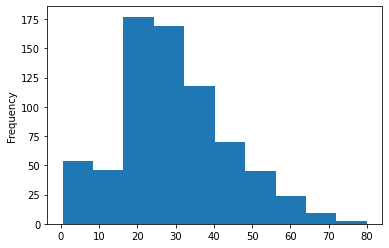

In [11]:
df_titanic.age.plot(kind="hist")

Hay varias maneras de reemplazar valores de tipo numérico.

In [10]:
#La media de las edades
df_titanic["age"].mean()

29.69911764705882

In [11]:
df_titanic["age"].fillna(df_titanic["age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [12]:
#Mediana de las edades
df_titanic["age"].median()

28.0

In [13]:
df_titanic["age"].fillna(df_titanic["age"].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [14]:
#Moda de las edades
df_titanic["age"].mode()[0]

24.0

In [13]:
df_titanic["age"].fillna(df_titanic["age"].mode()[0])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Una vez elegido el método para reemplazar se puede realizar una de las siguientes dos opciones

In [15]:
#df_titanic["age"].fillna(df_titanic["age"].mean(), inplace=True)
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean())

In [16]:
df_titanic["age"].isna().sum()

0

In [17]:
df_titanic["embark_town"]

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

Se pueden arreglar varias columnas al tiempo

In [18]:
dict_na = {
    'age':df_titanic["age"].mean(),
    'embarked':df_titanic["embarked"].mode()[0],
    'deck': df_titanic["deck"].mode()[0],
    'embark_town':"No info"
}

df_titanic.fillna(value=dict_na, inplace=True)

In [19]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [21]:
df_titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Corregir tipos

Muchas veces es necesario corregir los tipos de datos en las columnas del DataFrame cuando estos no coinciden con los esperados/deseados. Pandas brinda la el método astype() para cambiar adecuadamente los tipos de datos.

#### Tipos categóricos

In [22]:
df_titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [23]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Se puede analizar cada tipo para ver sus características

In [24]:
df_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [27]:
#Analizando la columna sex
df_titanic["sex"].unique()

array(['male', 'female'], dtype=object)

In [29]:
df_titanic.loc[df_titanic["sex"] == "male","sex"] = "m"
df_titanic.loc[df_titanic["sex"] == "female","sex"] = "f"

"""
#Otra manera usando el método map
df_titanic.sex = df_titanic.sex.map({"male":"m", "female":"f"})
"""
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,m,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,f,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,f,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,f,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,m,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,m,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,f,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,f,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,m,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [30]:
df_titanic.sex.unique()

array(['m', 'f'], dtype=object)

In [31]:
#Cambiar tipos con astype:
df_titanic.sex = df_titanic.sex.astype("category")

In [32]:
df_titanic.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
who              object
adult_male         bool
deck             object
embark_town      object
alive            object
alone              bool
dtype: object

In [33]:
#Para la columna "class"
df_titanic["class"].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [34]:
df_titanic["class"] = df_titanic["class"].astype("category")

In [36]:
df_titanic.dtypes

survived          int64
pclass            int64
sex            category
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck             object
embark_town      object
alive            object
alone              bool
dtype: object

#### datetime

In [40]:
df_oro = pd.read_csv("./Datos_historicos_Futuros_oro.csv")
df_oro

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.09.2023,"1.952,60","1.955,65","1.958,85","1.950,95",NaN,"-0,04%"
1,18.09.2023,"1.953,40","1.945,70","1.955,70","1.943,80","138,03K","0,37%"
2,15.09.2023,"1.946,20","1.932,50","1.952,40","1.931,20","199,77K","0,69%"
3,14.09.2023,"1.932,80","1.930,70","1.934,50","1.921,70","201,74K","0,02%"
4,13.09.2023,"1.932,50","1.935,20","1.938,40","1.927,20","161,00K","-0,13%"
...,...,...,...,...,...,...,...
186,06.01.2023,"1.869,70","1.835,90","1.875,20","1.835,20","215,37K","1,58%"
187,05.01.2023,"1.840,60","1.861,20","1.864,30","1.829,90","188,60K","-0,99%"
188,04.01.2023,"1.859,00","1.845,20","1.871,30","1.842,00","198,35K","0,70%"
189,03.01.2023,"1.846,10","1.831,80","1.856,60","1.831,30","212,27K","0,56%"


In [41]:
df_oro.dtypes

Fecha       object
Último      object
Apertura    object
Máximo      object
Mínimo      object
Vol.        object
% var.      object
dtype: object

Hay varias maneras de convertir de object a formato a datetime

Con astype

In [46]:
import warnings
warnings.filterwarnings('ignore')

df_oro["Fecha"].astype("datetime64[ns]")

0     2023-09-19
1     2023-09-18
2     2023-09-15
3     2023-09-14
4     2023-09-13
         ...    
186   2023-06-01
187   2023-05-01
188   2023-04-01
189   2023-03-01
190   2023-02-01
Name: Fecha, Length: 191, dtype: datetime64[ns]

Con to_datetime()

In [50]:
df_oro.Fecha = pd.to_datetime(df_oro.Fecha, format="%d.%m.%Y")
df_oro

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-09-19,"1.952,60","1.955,65","1.958,85","1.950,95",NaN,"-0,04%"
1,2023-09-18,"1.953,40","1.945,70","1.955,70","1.943,80","138,03K","0,37%"
2,2023-09-15,"1.946,20","1.932,50","1.952,40","1.931,20","199,77K","0,69%"
3,2023-09-14,"1.932,80","1.930,70","1.934,50","1.921,70","201,74K","0,02%"
4,2023-09-13,"1.932,50","1.935,20","1.938,40","1.927,20","161,00K","-0,13%"
...,...,...,...,...,...,...,...
186,2023-01-06,"1.869,70","1.835,90","1.875,20","1.835,20","215,37K","1,58%"
187,2023-01-05,"1.840,60","1.861,20","1.864,30","1.829,90","188,60K","-0,99%"
188,2023-01-04,"1.859,00","1.845,20","1.871,30","1.842,00","198,35K","0,70%"
189,2023-01-03,"1.846,10","1.831,80","1.856,60","1.831,30","212,27K","0,56%"


In [51]:
df_oro.dtypes

Fecha       datetime64[ns]
Último              object
Apertura            object
Máximo              object
Mínimo              object
Vol.                object
% var.              object
dtype: object

In [53]:
df_oro.Fecha.min(), df_oro.Fecha.max()

(Timestamp('2023-01-02 00:00:00'), Timestamp('2023-09-19 00:00:00'))

In [55]:
intervalo_de_tiempo = df_oro.Fecha.max() - df_oro.Fecha.min()
intervalo_de_tiempo

Timedelta('260 days 00:00:00')

In [56]:
intervalo_de_tiempo.components

Components(days=260, hours=0, minutes=0, seconds=0, milliseconds=0, microseconds=0, nanoseconds=0)

In [57]:
#Una query
df_oro[(df_oro.Fecha >= "2023-05-08") & (df_oro.Fecha <= "2023-05-20")]

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
90,2023-05-19,"1.978,70","1.960,00","1.976,70","1.960,00","0,11K","1,13%"
91,2023-05-18,"1.956,50","1.956,80","1.956,80","1.956,80","0,02K","-1,22%"
92,2023-05-17,"1.980,70","1.983,60","1.983,60","1.983,60","0,01K","-0,39%"
93,2023-05-16,"1.988,40","2.021,30","2.022,70","1.989,10","0,05K","-1,47%"
94,2023-05-15,"2.018,00","2.013,80","2.017,10","2.013,80","0,00K","-0,09%"
95,2023-05-12,"2.019,80","2.020,50","2.027,80","2.005,70","220,50K","-0,03%"
96,2023-05-11,"2.020,50","2.036,80","2.047,60","2.016,70","296,98K","-0,81%"
97,2023-05-10,"2.037,10","2.041,60","2.056,00","2.028,30","260,81K","-0,28%"
98,2023-05-09,"2.042,90","2.028,40","2.045,10","2.026,40","199,70K","0,48%"
99,2023-05-08,"2.033,20","2.024,60","2.037,10","2.022,00","182,21K","0,41%"


In [83]:
df_oro[df_oro["Fecha"].dt.month==9]

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-09-19,"1.952,60","1.955,65","1.958,85","1.950,95",NaN,"-0,04%"
1,2023-09-18,"1.953,40","1.945,70","1.955,70","1.943,80","138,03K","0,37%"
2,2023-09-15,"1.946,20","1.932,50","1.952,40","1.931,20","199,77K","0,69%"
3,2023-09-14,"1.932,80","1.930,70","1.934,50","1.921,70","201,74K","0,02%"
4,2023-09-13,"1.932,50","1.935,20","1.938,40","1.927,20","161,00K","-0,13%"
5,2023-09-12,"1.935,10","1.945,60","1.947,50","1.929,90","161,99K","-0,62%"
6,2023-09-11,"1.947,20","1.943,30","1.954,60","1.939,50","131,08K","0,23%"
7,2023-09-08,"1.942,70","1.943,80","1.954,00","1.940,80","138,69K","0,01%"
8,2023-09-07,"1.942,50","1.942,20","1.947,90","1.940,30","117,17K","-0,09%"
9,2023-09-06,"1.944,20","1.951,50","1.954,50","1.940,00","148,78K","-0,43%"


In [89]:
df_oro["Fecha"].dt.year==2022

0      False
1      False
2      False
3      False
4      False
       ...  
186    False
187    False
188    False
189    False
190    False
Name: Fecha, Length: 191, dtype: bool

In [86]:
#Se pueden realizar operaciones entre fechas
df_oro.Fecha - pd.Timedelta(days=400,
                            hours=2,
                            minutes=45,
                            seconds=32, 
                            milliseconds=45,
                            microseconds=345,
                            nanoseconds=34)

0     2022-08-14 21:14:27.954654966
1     2022-08-13 21:14:27.954654966
2     2022-08-10 21:14:27.954654966
3     2022-08-09 21:14:27.954654966
4     2022-08-08 21:14:27.954654966
                   ...             
186   2021-12-01 21:14:27.954654966
187   2021-11-30 21:14:27.954654966
188   2021-11-29 21:14:27.954654966
189   2021-11-28 21:14:27.954654966
190   2021-11-27 21:14:27.954654966
Name: Fecha, Length: 191, dtype: datetime64[ns]

In [61]:
pd.to_datetime("today")

Timestamp('2023-09-27 19:22:41.385978')

In [62]:
from  datetime import datetime

In [63]:
datetime.today()

datetime.datetime(2023, 9, 27, 19, 23, 46, 537260)

In [87]:
1 - (45/1000 + 345/1000000 + 34/1000000000)

0.954654966